 ## import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

KNN Classification, Naive Bayes, Decision Tree, SVM, Logistic Regression, and Linear and Polynomial Regressions

### loading the data from csv file to a Pandas DataFrame

In [2]:
diabetes_data = pd.read_csv('../Datasets/diabetes.csv')

### # printing the first 5 rows of the dataframe

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### number of rows and columns in the dataframe

In [4]:
diabetes_data.shape

(768, 9)

# check relationship between columns

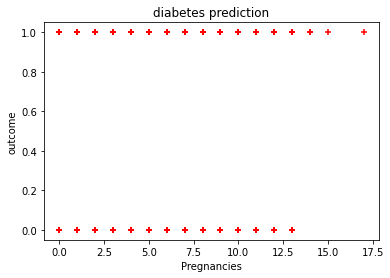

In [5]:
%matplotlib inline
plt.xlabel('Pregnancies')
plt.ylabel('outcome')
plt.title('diabetes prediction')
plt.scatter(diabetes_data.Pregnancies, diabetes_data.Outcome,color='red',marker='+')

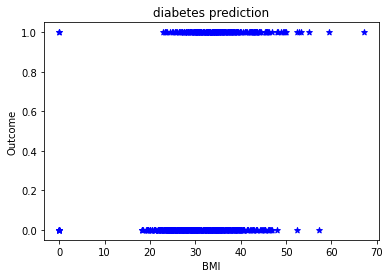

In [6]:
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.title('diabetes prediction')
plt.scatter(diabetes_data.BMI, diabetes_data.Outcome,color='blue',marker='*')

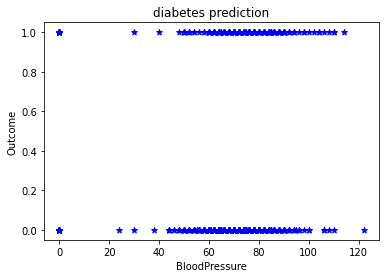

In [7]:
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.title('diabetes prediction')
plt.scatter(diabetes_data.BloodPressure, diabetes_data.Outcome,color='blue',marker='*')

### getting more information about the dataset

In [8]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
diabetes_data=diabetes_data.interpolate()
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### checking for missing values in each column

In [11]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### getting some statistical measures about the data

In [12]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### distribution of target Variable

In [13]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# 1  --> Parkinson's Positive

# 0 --> Healthy

### grouping the data based on the target variable

In [14]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Data Pre-Processing

### Separating the features & Target

In [15]:
X = diabetes_data.drop(columns=['Outcome'], axis=1)
Y = diabetes_data['Outcome']

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Splitting the data to training data & Test data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Model Training

# Support Vector Machine Model

In [20]:
model = svm.SVC(kernel='linear')

### training the SVM model with training data

In [21]:
model1=model.fit(X_train, Y_train)

## Model Evaluation

### Accuracy Score

In [22]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [23]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7719869706840391


# Naive bayes Model

In [24]:
gnb = GaussianNB()

### training the naive bayes model with training data

In [25]:
gnb.fit(X_train, Y_train)

GaussianNB()

## Model Evaluation

### Accuracy Score

In [26]:
X_train_prediction = gnb.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [27]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7654723127035831


In [28]:
import pickle


In [29]:
pickle.dump(model1, open('diabetes.pkl','wb'))

In [35]:
model1 = pickle.load(open('diabetes','rb'))
result = model.predict([['12','48','48','59','89','78','59','78']])
print(result)

[1]


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
